**Laboratorio de métodos computacionales**

**Universidad de los Andes**

## Cadenas de Markov

Una cadena de Markov es un objeto matemático que consiste en una secuencia de estados y un conjunto de probabilidades que describen las transiciones entre esos estados. La característica principal que tiene esta cadena es que la probabilidad de moverse a otros estados depende solamente del estado actual. Dada una cadena, se puede realizar una caminata aleatoria eligiendo un punto de partida y moviéndose a otros estados siguiendo las probabilidades de transición. 

### Caminata aleatoria en un grafo

cadena de Marcov de cuatro estados:

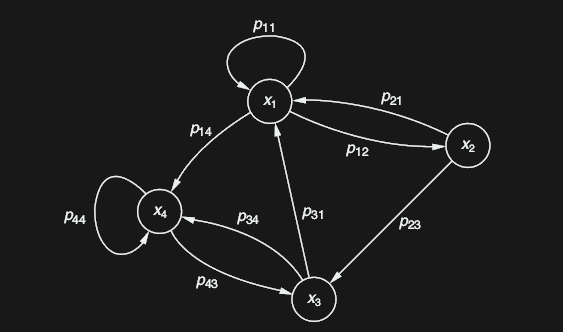

$$P = \begin{bmatrix}
p_{11} & p_{12} & 0 & p_{14} \\ 
p_{21} & 0  & p_{23} & 0 \\
p_{31} & 0  & 0 & p_{34} \\
0 & 0  & p_{43} & p_{44} 
\end{bmatrix}$$

### La distribución invariante

$$P = \begin{bmatrix}
0.3 & 0.2 & 0.5 \\ 
0.4 & 0.3 & 0.3 \\ 
0.3 & 0.4 & 0.3  
\end{bmatrix}$$

## Algoritmo Metropolis-Hastings

El algoritmo Metropolis-Hastings puede extraer muestras de cualquier distribución de probabilidad $P (x)$, siempre que sepamos una función $f (x)$ proporcional a la densidad de probabilidad $P$ y los valores de $f (x)$ se puedan calcular.

si $Q$ es una densidad de probabilidad arbitraria que sugiere un candidato para el siguiente valor de muestra $x_{\text{new}}$ dado el valor de muestra anterior $x_{\text{old}}$, se tiene

$$ a = \frac{P(x_{\text{new}})}{P(x_{\text{old}})}\frac{Q(x_{\text{old}}|x_{\text{new}})}{Q(x_{\text{new}}|x_{\text{old}})} = \frac{f(x_{\text{new}})}{f(x_{\text{old}})}\frac{Q(x_{\text{old}}|x_{\text{new}})}{Q(x_{\text{new}}|x_{\text{old}})} $$

donde $a$ es el criterio de aceptación que se compara con un número aleatorio entre 0 y 1 (seleccionado de una distribución uniforme) para rechazar o aceptar el candidato $x_{\text{new}}$. Si $Q$ es simétrica, $Q(x_{\text{new}}|x_{\text{old}}) = Q(x_{\text{old}}|x_{\text{new}})$ y $a$ se puede calcular como

$$ a = \frac{f(x_{\text{new}})}{f(x_{\text{old}})} $$


**Ejemplo:** encontrar un conjunto de números aleatorios $X$ que siga la distribucion de Cauchy con $\gamma = 1$ y $x_0 = 0$
$$
f(x; x_0,\gamma) = { 1 \over \pi } \left[ { \gamma \over (x - x_0)^2 + \gamma^2  } \right]
$$

**Ejemplo:** encontrar un conjunto de números aleatorios $X$ que siga la distribucion de Laplace con $\beta = 3$ y $\mu = 0$


$$ f(x;\mu,b) = \frac{1}{2b} \exp \left( -\frac{|x-\mu|}{b} \right) $$